In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr, skew, kurtosis
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
loan = pd.read_csv(os.getcwd() + '\\data\\train_loanpred.csv')
print(loan.info())
loan.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null int64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 43.2+ KB
None


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.00000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002648,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.24430,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.24876,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.00000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.00000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.50000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.25000,168.000000,360.00000,1.000000,NaN,NaN


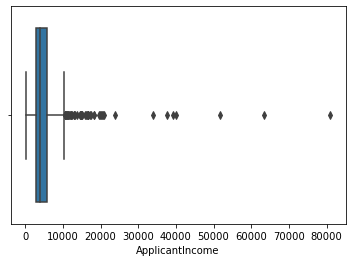

In [4]:
sns.boxplot(x= loan['ApplicantIncome'])

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


([<matplotlib.patches.Wedge at 0xcc7b050>,
 [Text(0.635606743802125, 0.8977772926696577, 'Rural'),
  Text(-1.0995153784610343, 0.032648622140739915, 'Semiurban'),
  Text(0.6086800940957416, -0.9162469880177502, 'Urban')],
 [Text(0.3466945875284318, 0.4896967050925405, '30.4%'),
  Text(-0.5997356609787459, 0.0178083393494945, '38.3%'),
  Text(0.3320073240522227, -0.49977108437331824, '31.3%')])

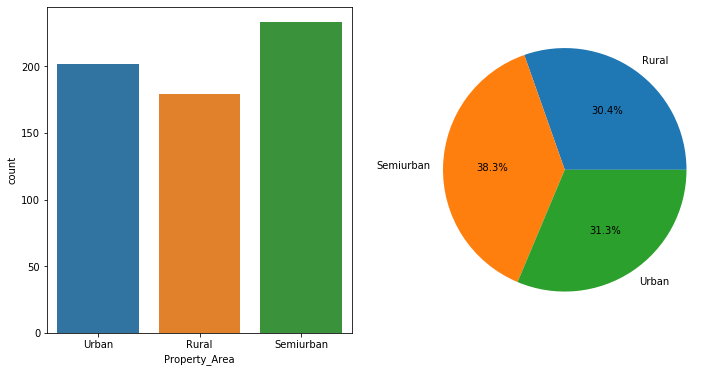

In [7]:
#unvariate visualization - categorical
print(loan['Property_Area'].value_counts())
fig= plt.figure(figsize=(12,6))

ax = fig.add_subplot(121)
sns.countplot(loan['Property_Area'], ax=ax)

ax2 = fig.add_subplot(122)
loan_amt = loan.groupby(['Property_Area'])['LoanAmount'].sum()
ax2.pie(loan_amt, labels=loan_amt.index, autopct='%1.1f%%')

count    480.000000
mean     144.735417
std       80.508164
min        9.000000
25%      100.000000
50%      128.000000
75%      170.000000
max      600.000000
Name: LoanAmount, dtype: float64


(array([ 42., 194., 153.,  49.,  22.,   8.,   3.,   3.,   3.,   3.]),
 array([  9. ,  68.1, 127.2, 186.3, 245.4, 304.5, 363.6, 422.7, 481.8,
        540.9, 600. ]),
 <a list of 10 Patch objects>)

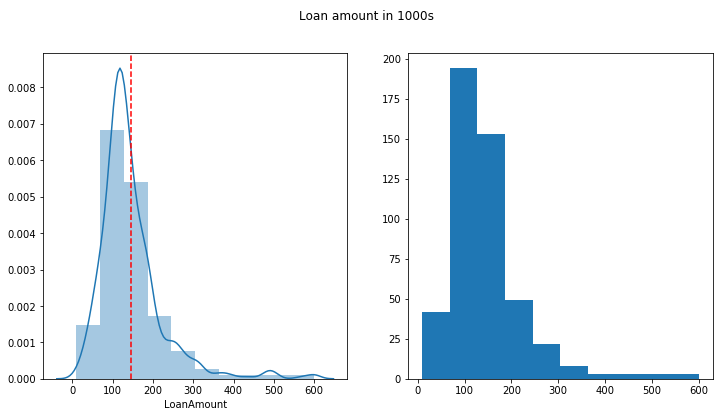

In [132]:
#unvariate visualization - numerical
print(loan["LoanAmount"].describe())

fig= plt.figure(figsize=(12,6))

ax = fig.add_subplot(121)
sns.distplot(loan["LoanAmount"], bins=10, ax=ax)
ax.axvline(np.mean(loan['LoanAmount']),  ls='--', color='r')
ax.annotate("mean", xy=(150,0.01))
plt.suptitle('Loan amount in 1000s')

ax2 = fig.add_subplot(122)
ax2.hist(loan['LoanAmount'], bins=10)

In [166]:
#data count and bins for hitogram
data_pts , bins = np.histogram(loan['LoanAmount'], bins=10)
print("Data count: ", data_pts)
print("\nBins:", bins)

#How to interpret KDE y-axis?
#We cannot read off probabilities directly from the y-axis; probabilities are accessed only as areas under the curve.
bin_interval = bins[1] - bins[0] 
total_rows = loan.shape[0]
y_val = []
prob_val = []
for i in range(len(data_pts)):
    prob = data_pts[i]/ total_rows
    prob_val.append(prob)
    y_val.append(prob / bin_interval)

print("\nY-axis:", y_val)
print ("\nProbabilities:", prob_val) #y-axis * bin-size

Data count:  [ 42 194 153  49  22   8   3   3   3   3]

Bins: [  9.   68.1 127.2 186.3 245.4 304.5 363.6 422.7 481.8 540.9 600. ]

Y-axis: [0.0014805414551607445, 0.006838691483361535, 0.005393401015228427, 0.0017272983643542021, 0.0007755217146080091, 0.0002820078962210942, 0.00010575296108291033, 0.00010575296108291033, 0.00010575296108291033, 0.00010575296108291033]

Probabilities: [0.0875, 0.4041666666666667, 0.31875, 0.10208333333333333, 0.04583333333333333, 0.016666666666666666, 0.00625, 0.00625, 0.00625, 0.00625]


In [123]:
#skewness & kurtosis
print("Skewness:",  skew(loan["ApplicantIncome"]))
print("Kurtosis:",  kurtosis(loan["ApplicantIncome"]))

Skewness: 6.895392015297448
Kurtosis: 73.28143358748261


[(69.15, 27100.0], (27100.0, 54050.0], (54050.0, 81000.0]]
Categories (3, interval[float64]): [(69.15, 27100.0] < (27100.0, 54050.0] < (54050.0, 81000.0]]


Text(0.5, 0.98, 'Dependents Vs Applicant Income')

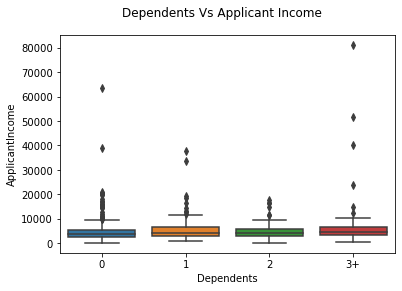

In [17]:
#bivariate visualization - (Cat vs Num)
sns.boxplot(x='Dependents', y='ApplicantIncome', data=loan)
plt.suptitle("Dependents Vs Applicant Income")

Married
No     1316.558685
Yes    1794.630653
Name: CoapplicantIncome, dtype: float64

 Married  CoapplicantIncome
No       0                    0.232899
         1666                 0.006515
         2083                 0.003257
         2531                 0.003257
         1213                 0.001629
                                ...   
Yes      8106                 0.001629
         8333                 0.001629
         10968                0.001629
         11300                0.001629
         20000                0.001629
Name: CoapplicantIncome, Length: 306, dtype: float64


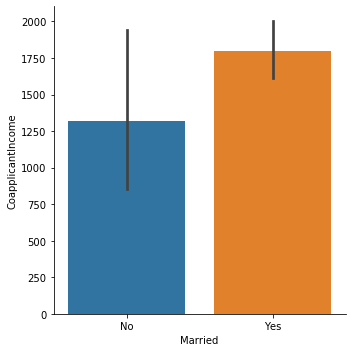

In [56]:
#bimodal visualization - (Cat vs Num)
sns.catplot(x='Married', y='CoapplicantIncome', kind='bar', data=loan)
gp_inc = loan.groupby(by=['Married'])['CoapplicantIncome']
print(gp_inc.mean())
print('\n', gp_inc.value_counts()/len(loan))

Text(0.5, 0.98, 'Loan Amount Vs Applicant Income')

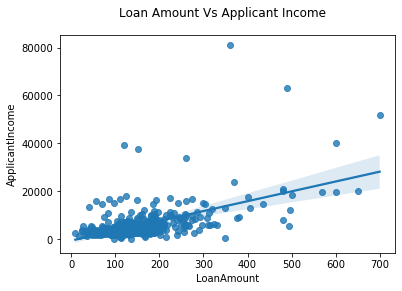

In [7]:
#bimodal visualization - (Num vs Num)
sns.regplot(x="LoanAmount", y='ApplicantIncome', data=loan)
plt.suptitle("Loan Amount Vs Applicant Income")

c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


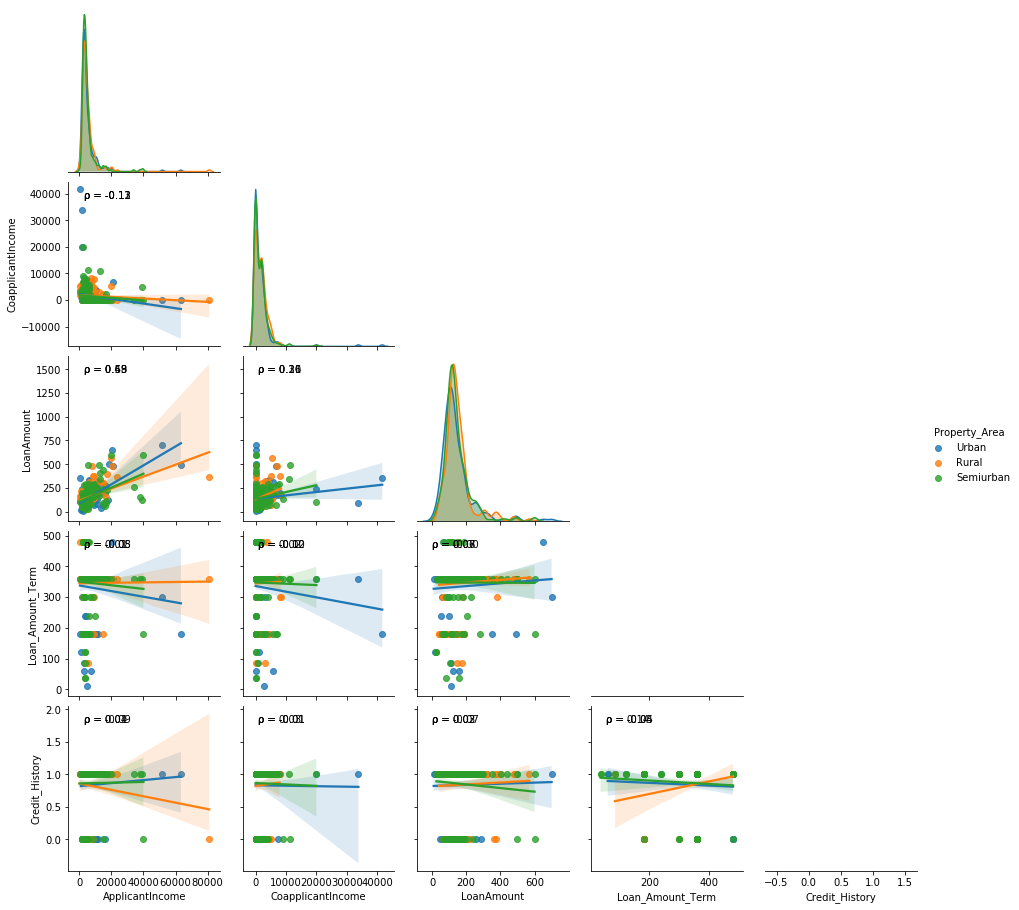

In [8]:
#Check correlation between continuous columns 
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(data=loan, corner=True, kind='reg', hue='Property_Area')
g.map_lower(corrfunc)


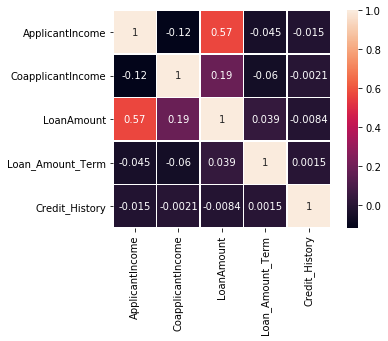

In [9]:
#heat map to check correlation
pear_corr = loan.corr(method='pearson') #kendall,spearman
sns.heatmap(pear_corr, square=True, linewidths=.5, annot=True)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64


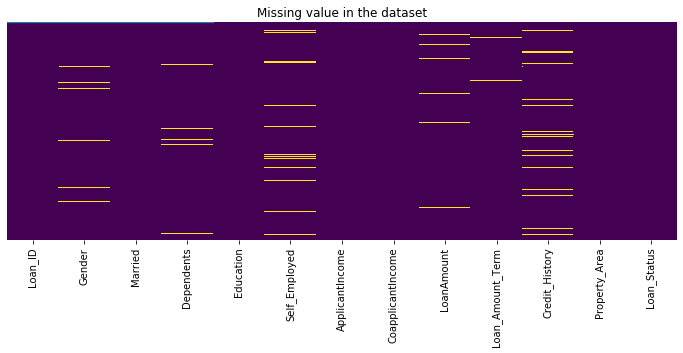

In [58]:
#check for missing values
loan_null = loan.isnull().sum().sort_values(ascending=False)
print(loan_null)

plt.figure(figsize=(12,4))
sns.heatmap(loan.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing value in the dataset');


desc = loan.describe().T
desc["missing%"] = 1 - (desc['count']/ len(loan))
desc.sort_values(by="missing%", ascending= False, inplace=True)
plt.plot('missing%', data=desc)

In [59]:
#Missing value imputation
loan.dropna(how='any', axis=0, inplace=True)

In [60]:
#skewness & kurtosis
print("Skewness:",  skew(loan['LoanAmount']))
print("Kurtosis:",  kurtosis(loan['LoanAmount']))

Skewness: 2.3540509424728953
Kurtosis: 8.401937052352395


In [61]:
loan.std()

ApplicantIncome      5668.251251
CoapplicantIncome    2617.692797
LoanAmount             80.508164
Loan_Amount_Term       65.212401
Credit_History          0.353307
dtype: float64

In [62]:
#binning
income_bins = pd.cut(loan['ApplicantIncome'], 3)
print(income_bins.unique())

[(69.15, 27100.0], (27100.0, 54050.0], (54050.0, 81000.0]]
Categories (3, interval[float64]): [(69.15, 27100.0] < (27100.0, 54050.0] < (54050.0, 81000.0]]


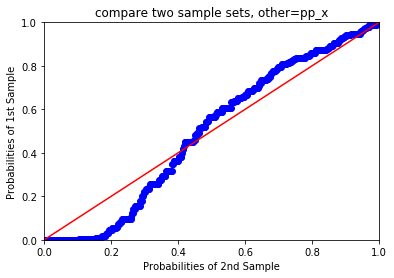

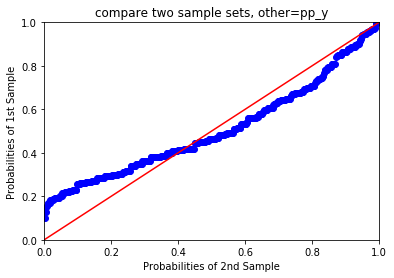

In [98]:
#probability plot
pp_x = sm.ProbPlot(loan.ApplicantIncome, fit=True)
pp_y = sm.ProbPlot(loan.LoanAmount, fit=True)
fig = pp_y.ppplot(line='45', other=pp_x)
h = plt.title('compare two sample sets, other=pp_x')
fig = pp_x.ppplot(line='45', other=pp_y)
h = plt.title('compare two sample sets, other=pp_y')

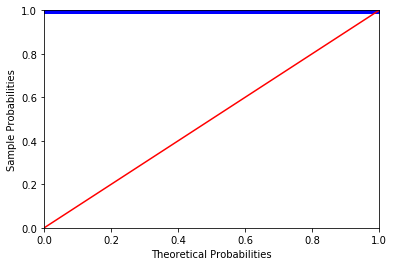

In [97]:
import scipy.stats as scs
pp = sm.ProbPlot(loan['LoanAmount'], scs.norm, loc=0, scale=1).ppplot(line='45')

In [170]:
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95
data = loan['LoanAmount']

n = len(data)
m = mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
print(start)
end = m + h
print(end)

c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  import sys


137.51493555443724
151.95589777889612
